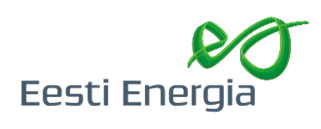

https://www.enefit.ee/en

A Eesti Energia AS é uma **empresa pública de energia limitada na Estônia**. É a maior empresa de **xisto betuminoso** para energia do mundo.

Em 2014, operava na Estônia, Letônia, Lituânia, Finlândia, Jordânia e Utah (Estados Unidos).

O grupo tem três áreas principais de operação:
- geração de eletricidade
- produção de óleo de xisto
- venda e distribuição de eletricidade

**Dor de negócioo**: alto custo de produção

**Causa raiz:** alto custo de energia

**Objetivo**: Estudar os dados de custo de energia e sugerir um plano de ação para baixar o custo

In [1]:
# Importação das bibliotecas e extração dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Estudos Dados/[Data Viking] Imersão AED 14-09-2024/electricity_prices.csv')

Mounted at /content/drive


In [3]:
# Análise Exploratória dos Dados

In [4]:
df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


**Levantamento do Dicionário de Dados**

- **forecast_date** - A data e hora em que a previsão do preço foi feita.
-**euros_per_mwh** - O preço em euros por megawatt-hora (MWh) de eletricidade para o momento específico indicado pela forecast_date.
- **origin_date** - A data e hora de origem dos dados.
- **data_block_id** - identificador para o bloco de dados específico.

In [5]:
# Avaliação dos tipos de colunas, dimensões e valores nulos
df.info()
print('\nTamanho do dataframe: ',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15286 entries, 0 to 15285
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   forecast_date  15286 non-null  object 
 1   euros_per_mwh  15286 non-null  float64
 2   origin_date    15286 non-null  object 
 3   data_block_id  15286 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 477.8+ KB

Tamanho do dataframe:  (15286, 4)


In [6]:
# Conversão da coluna 'forecast_date' para o formato de data
df['forecast_date'] = pd.to_datetime(df['forecast_date'])
df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [7]:
# Aumento da granularidade das datas de previsão
df['ano_forecast'] = df['forecast_date'].dt.year
df['mes_forecast'] = df['forecast_date'].dt.month
df['dia_forecast'] = df['forecast_date'].dt.day
df['data_forecast'] = df['forecast_date'].dt.date
df['hora_forecast'] = df['forecast_date'].dt.hour

df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id,ano_forecast,mes_forecast,dia_forecast,data_forecast,hora_forecast
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1,2021,9,1,2021-09-01,0
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1,2021,9,1,2021-09-01,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1,2021,9,1,2021-09-01,2
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1,2021,9,1,2021-09-01,3
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1,2021,9,1,2021-09-01,4


In [8]:
# Análises estatísticas básicas
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
forecast_date,15286,2022-07-16 11:16:41.857909248,2021-09-01 00:00:00,2022-02-07 05:15:00,2022-07-16 11:30:00,2022-12-22 16:45:00,2023-05-30 23:00:00,NaN
euros_per_mwh,15286.0,157.064176,-10.06,85.29,128.28,199.7975,4000.0,121.148625
data_block_id,15286.0,318.99071,1.0,160.0,319.0,478.0,637.0,183.890301
ano_forecast,15286.0,2022.043896,2021.0,2022.0,2022.0,2022.0,2023.0,0.651992
mes_forecast,15286.0,6.458851,1.0,3.0,6.0,10.0,12.0,3.672383
dia_forecast,15286.0,15.678333,1.0,8.0,16.0,23.0,31.0,8.773668
hora_forecast,15286.0,11.501243,0.0,6.0,12.0,17.75,23.0,6.922013


In [9]:
# Variação diária dos preços
analise_serie_media_preco = df.groupby(by=['data_forecast']).agg(media_preco=('euros_per_mwh', 'mean'))

# Gerando médias móveis e tendências
analise_serie_media_preco['media_movel_semanal'] = analise_serie_media_preco.media_preco.rolling(window=30).mean()
analise_serie_media_preco['media_movel_mensal'] = analise_serie_media_preco.media_preco.rolling(window=7).mean()

analise_serie_media_preco.head(7)

,media_preco,media_movel_semanal,media_movel_mensal
data_forecast,,,
2021-09-01,110.467083,NaN,NaN
2021-09-02,112.631250,NaN,NaN
2021-09-03,107.429583,NaN,NaN
2021-09-04,106.112917,NaN,NaN
2021-09-05,99.045417,NaN,NaN
2021-09-06,120.614583,NaN,NaN
2021-09-07,123.813750,NaN,111.44494


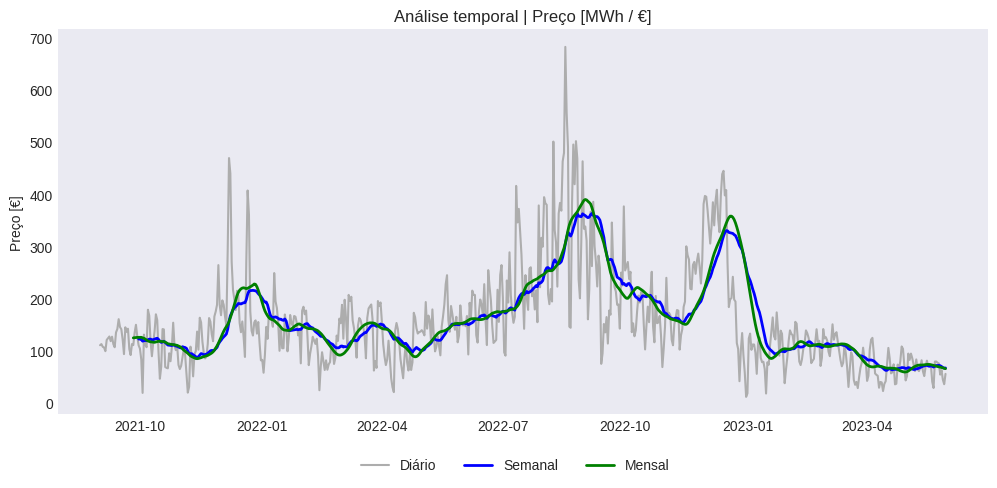

In [10]:
# Análise temporal
plt.figure( figsize=(12, 5) )
plt.title('Análise temporal | Preço [MWh / €]')
plt.plot( analise_serie_media_preco['media_preco'], color='#adadad', label='Diário' )
plt.plot( analise_serie_media_preco['media_movel_semanal'], color='blue', label='Semanal', linewidth=2 )
plt.plot( analise_serie_media_preco['media_movel_mensal'].rolling(window=20).mean(), color='green', label='Mensal', linewidth=2 )
plt.legend(loc='upper left', bbox_to_anchor=(0.32, -0.1), ncol=3, borderaxespad=0);
plt.ylabel('Preço [€]');

In [11]:
# Gerando Data para o Boxplot
df['data_boxplot'] = df['ano_forecast'].astype('str') + '-' + df['mes_forecast'].astype('str')
df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id,ano_forecast,mes_forecast,dia_forecast,data_forecast,hora_forecast,data_boxplot
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1,2021,9,1,2021-09-01,0,2021-9
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1,2021,9,1,2021-09-01,1,2021-9
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1,2021,9,1,2021-09-01,2,2021-9
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1,2021,9,1,2021-09-01,3,2021-9
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1,2021,9,1,2021-09-01,4,2021-9


In [12]:
# Análise anual dos preços
df.groupby(by=['ano_forecast']).describe()['euros_per_mwh']

,count,mean,min,25%,50%,75%,max,std
ano_forecast,,,,,,,,
2021,2928.0,137.159225,0.07,87.5925,118.10,171.275,1000.07,91.774243
2022,8759.0,192.834105,-0.04,104.4300,160.76,249.420,4000.00,135.654697
2023,3599.0,86.203626,-10.06,47.3650,85.59,115.580,263.74,47.389201


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '2021-9'),
  Text(1, 0, '2021-10'),
  Text(2, 0, '2021-11'),
  Text(3, 0, '2021-12'),
  Text(4, 0, '2022-1'),
  Text(5, 0, '2022-2'),
  Text(6, 0, '2022-3'),
  Text(7, 0, '2022-4'),
  Text(8, 0, '2022-5'),
  Text(9, 0, '2022-6'),
  Text(10, 0, '2022-7'),
  Text(11, 0, '2022-8'),
  Text(12, 0, '2022-9'),
  Text(13, 0, '2022-10'),
  Text(14, 0, '2022-11'),
  Text(15, 0, '2022-12'),
  Text(16, 0, '2023-1'),
  Text(17, 0, '2023-2'),
  Text(18, 0, '2023-3'),
  Text(19, 0, '2023-4'),
  Text(20, 0, '2023-5')])

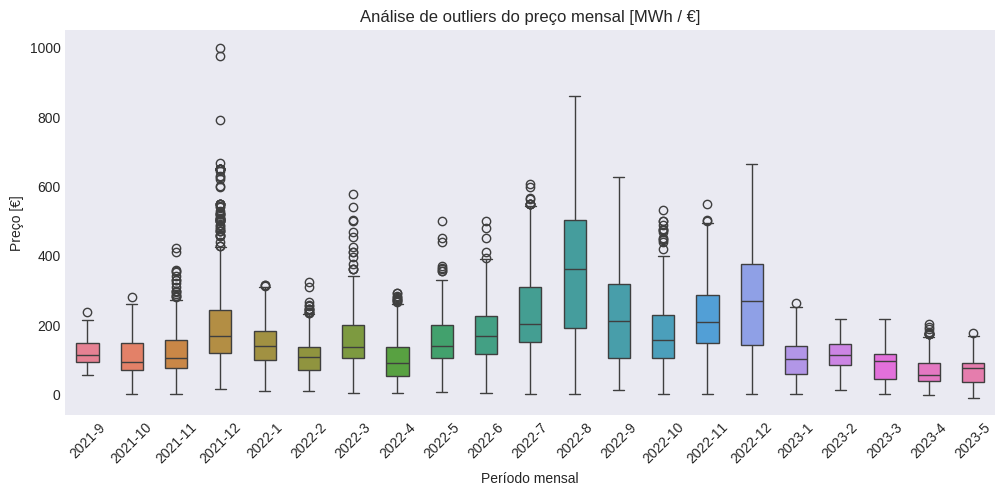

In [13]:
# Análise de outliers de preço via Boxplot
plt.figure(figsize=(12, 5))
plt.title('Análise de outliers do preço mensal [MWh / €]')
sns.boxplot(
    data=df.loc[df.euros_per_mwh < 4000],
    x='data_boxplot', y='euros_per_mwh',
    width=0.5,
    hue='data_boxplot'
)
plt.ylabel('Preço [€]')
plt.xlabel('Período mensal')
plt.xticks(rotation=45)

In [14]:
df.loc[df['ano_forecast'] == 2023].groupby(by=['mes_forecast']).describe()['euros_per_mwh']

,count,mean,min,25%,50%,75%,max,std
mes_forecast,,,,,,,,
1,744.0,99.270027,0.05,57.1675,102.920,138.3600,263.74,53.733560
2,672.0,113.124851,12.68,85.0450,111.935,145.3700,216.93,42.978351
3,743.0,87.175989,1.78,43.9950,95.840,117.3500,217.09,43.955589
4,720.0,65.894208,-0.92,39.5550,56.635,91.1925,201.91,36.627774
5,720.0,66.881194,-10.06,36.7650,77.040,90.5000,178.29,39.409632


In [15]:
# Mapas de calor

# Consumo: Dia x Mês (2023)
analise_dia_mes = df.loc[df['ano_forecast'] == 2023].groupby(
    by=['mes_forecast', 'dia_forecast']).agg(
      media_preco = ('euros_per_mwh','mean')
        ).reset_index().pivot_table(
            index='dia_forecast', columns='mes_forecast', values='media_preco')

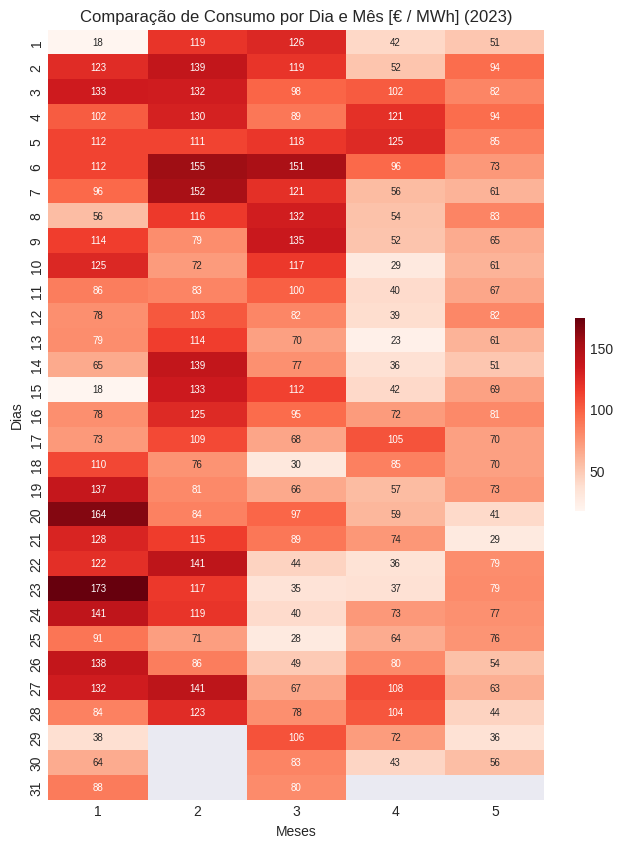

In [31]:
plt.figure(figsize=(8, 10))

sns.heatmap(
    analise_dia_mes,
    cmap='Reds',
    annot=True, fmt='.0f',
    annot_kws={"size": 7},
    cbar_kws={'shrink': 0.25}
)
plt.title('Comparação de Consumo por Dia e Mês [€ / MWh] (2023)')
plt.xlabel('Meses')
plt.ylabel('Dias');

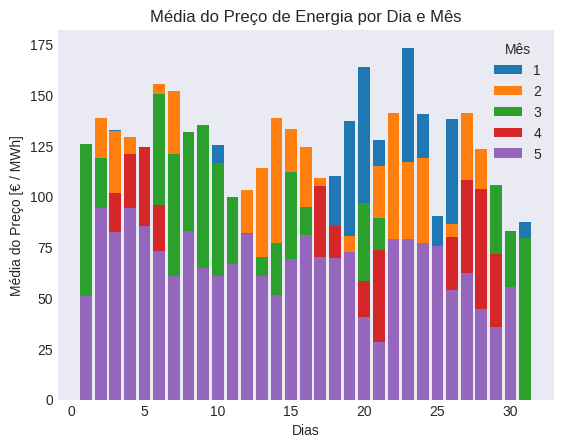

In [32]:
fig, ax = plt.subplots()

# Plotting
for mes in analise_dia_mes.columns:
    ax.bar(analise_dia_mes.index, analise_dia_mes[mes], label=str(mes))

# Customization
ax.set_xlabel('Dias')
ax.set_ylabel('Média do Preço [€ / MWh]')
ax.set_title('Média do Preço de Energia por Dia e Mês')
ax.legend(title='Mês', loc='upper right')

plt.show()

In [28]:
analise_dia_mes.describe()

mes_forecast,1,2,3,4,5
count,31.000000,28.000000,31.000000,30.000000,30.000000
mean,99.270027,113.124851,87.124989,65.894208,66.881194
std,38.171939,25.190745,32.667926,28.714073,16.516382
min,17.924583,70.743750,28.320417,22.730833,28.558750
25%,77.888750,85.819479,67.244583,41.730729,56.823437
50%,101.679583,116.360625,89.277083,57.583125,69.530833
75%,126.546042,132.632500,114.323958,83.966562,79.284271
max,173.370417,155.304583,150.513750,124.567917,94.417917


In [20]:
# Consumo: Hora x Dia (2023)
analise_hora_dia = df.loc[df['ano_forecast'] == 2023].groupby(
    by=['dia_forecast', 'hora_forecast']).agg(
      media_preco = ('euros_per_mwh', 'mean')
        ).reset_index().pivot_table(
            index='hora_forecast', columns='dia_forecast', values='media_preco')

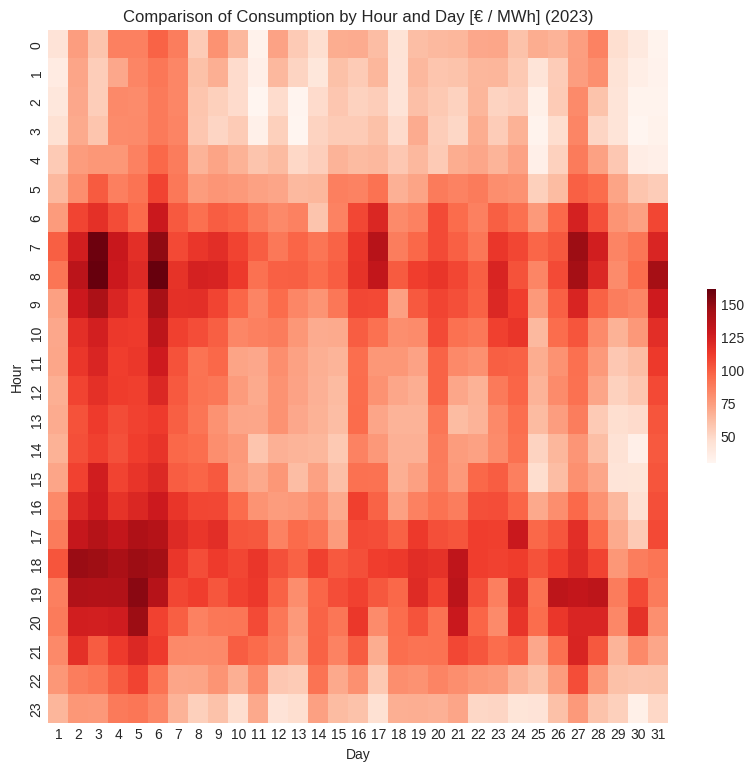

In [36]:
plt.figure( figsize=(10, 9) )

sns.heatmap(
    analise_hora_dia,
    cmap='Reds',
    annot=False,
    cbar_kws={'shrink': 0.25}
)
plt.title('Comparison of Consumption by Hour and Day [€ / MWh] (2023)')
plt.xlabel('Day')
plt.ylabel('Hour');

# Conclusões e Insights

Sugestão para reduzir custo de produção:

1. Analisando o comportamento do custo da energia ao longo do dia, observamos que o custo médio da energia é significativamente mais barato entre 22h e 5h, sendo quase três vezes mais barato do que produzir energia durante o horário comercial.
2. Para aproveitar essa diferença de custo, é essencial ampliar o uso de soluções de armazenamento de energia, como baterias de íon-lítio, sistemas de armazenamento de energia térmica e potencial gravitacional. Essas soluções permitem armazenar energia durante os períodos de menor custo e utilizá-la durante os horários de pico, otimizando o consumo e reduzindo os custos operacionais.
3. Além disso, uma mudança no modelo de cobrança pode ser benéfica. Oferecer tarifas mais baixas nos horários de menor consumo incentivaria os consumidores a deslocarem parte de seu consumo para esses períodos, promovendo uma distribuição mais homogênea do consumo de energia ao longo do dia. Isso não apenas reduziria a pressão sobre a infraestrutura de geração e distribuição durante os horários de pico, mas também poderia resultar em uma maior eficiência energética e menores custos para os consumidores.